# Homework 1

## 0. imports

In [1]:
import json
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

## 1. forecast 

50% На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

In [2]:
def string_to_datetime(string: str):
    month, year = map(int, string.split("/"))
    
    return datetime(year, month, 1)


DATETIME_START = string_to_datetime('06/1993')


def read_data():
    with open("data/top500.json", "r") as f:
        return json.load(f)


def date_to_days(date: str):
    return (string_to_datetime(date) - DATETIME_START).days


def preprocess_data(data):
    x = [date_to_days(elem) for elem in data.keys()]
    y = [value["#1"][0] for value in data.values()]

    return np.array(x)[:, None], np.array(y)

In [3]:
data = read_data()
x, y = preprocess_data(data)

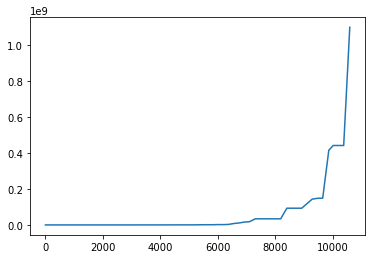

In [4]:
plt.plot(x, y)

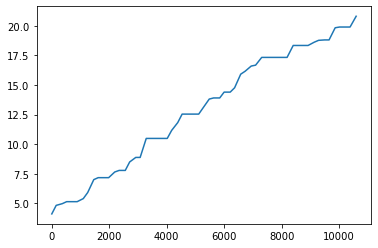

In [5]:
plt.plot(x, np.log(y + 1))

In [6]:
class LeastSquares:
    def __init__(self):
        self.w = None
        self.b = None
    
    def fit(self, x, y):
        x_with_bias = np.concatenate((x, np.ones_like(x)), axis=1)
        self.w, self.b = np.linalg.lstsq(x_with_bias, y_log, rcond=-1)[0]
    
    def predict(self, x):
        return x * self.w + self.b

In [7]:
y_log = np.log(1 + y)

clf = LeastSquares()
clf.fit(x, y_log)

preds = clf.predict(x)

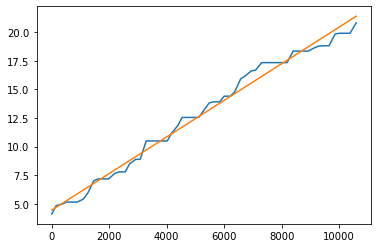

In [8]:
plt.plot(x, y_log)
plt.plot(x, preds)

In [9]:
date = '01/2025'
days = date_to_days(date)

pred = clf.predict(np.array([[days]]))
pred = np.exp(pred[0]) - 1
pred = int(pred[0])

print(f"Прогноз производитеольности топового суперкомпьютера к {date}: {pred} GFlop/s")

Прогноз производитеольности топового суперкомпьютера к 01/2025: 8886107013 GFlop/s


## 2. power percentage

50% оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

In [10]:
data = pd.read_excel("data/TOP500_202206.xlsx")
data.shape

(500, 38)

в данных содержатся пропуски

In [11]:
data_notna = data[~data['Power (kW)'].isna()]
data_notna.shape

(191, 38)

заметим, что мощность суперкомпьютера `Power (kW)` можно выразить через формулу

In [12]:
np.allclose(
    data_notna['Power (kW)'],
    data_notna['Rmax [TFlop/s]'] / data_notna['Energy Efficiency [GFlops/Watts]'],
    rtol=1e-5
)

True

заполним пропуски, используя среднюю энергоэффективность

In [13]:
power = data['Power (kW)'].copy()

mean_efficiency = data['Energy Efficiency [GFlops/Watts]'].mean()

power[power.isna()] = data[power.isna()]['Rmax [TFlop/s]'] / mean_efficiency

watts = power.sum()  # kW

print(watts)

479825.9064281167


In [14]:
TOTAL = 22158.5  # TWh

def kw_to_twh(kwatts: float):
    return kwatts * 3600 / 10 ** 9

данные о производстве электроэнергии взяты из https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production

In [15]:
percent = (kw_to_twh(watts) / TOTAL) * 100
print(f'Потребление энергии top-500 суперкомпьтерами от производимой электроэнергии: {percent:.4f} %')

Потребление энергии top-500 суперкомпьтерами от производимой электроэнергии: 0.0078 %


## 3. bonus

10% Бонус: Улучшить производительность программы с реализацией алгоритма матричного умножения (сниппет https://bit.ly/339RAhp )

In [ ]:
# TODO